In [39]:
#importing libraries
import numpy as np
import pandas as pd
import os

In [40]:
#loading data
df = pd.read_csv('/content/mobile_price_classification.csv')

In [4]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
print(np.unique(df['price_range']))

[0 1 2 3]


In [7]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Dividing the data to input and target
x = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [9]:
#Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [10]:
kbest = SelectKBest(chi2,k=10)

In [11]:
best_feaures = kbest.fit(x,y)

In [12]:
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [14]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(x.columns)

In [15]:
featureScores = pd.concat([df_columns,df_features],axis=1)

In [16]:
featureScores.columns = ['Features','Score']

In [17]:
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,front_cam,10.135166
14,sc_h,9.614878


In [20]:
x = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','front_cam','sc_h']]


In [21]:
x

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,front_cam,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [22]:
x = x.values
y = y.values

In [23]:
print(x.shape,y.shape)

(2000, 10) (2000,)


In [24]:
#  normalisation and scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
y = y.reshape(-1,1)

In [26]:
# now converting y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [27]:
y = y.toarray()

In [28]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [41]:
#ANN model
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history = model.fit(x_train,y_train,epochs=105,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 2s 23ms/step - loss: 1.4211 - accuracy: 0.2300 - val_loss: 1.4129 - val_accuracy: 0.2325
Epoch 2/105
25/25 [==============================] - 0s 5ms/step - loss: 1.3907 - accuracy: 0.2419 - val_loss: 1.3846 - val_accuracy: 0.2575
Epoch 3/105
25/25 [==============================] - 0s 6ms/step - loss: 1.3627 - accuracy: 0.2644 - val_loss: 1.3563 - val_accuracy: 0.2750
Epoch 4/105
25/25 [==============================] - 0s 6ms/step - loss: 1.3335 - accuracy: 0.2894 - val_loss: 1.3245 - val_accuracy: 0.3075
Epoch 5/105
25/25 [==============================] - 0s 8ms/step - loss: 1.2992 - accuracy: 0.3406 - val_loss: 1.2898 - val_accuracy: 0.3375
Epoch 6/105
25/25 [==============================] - 0s 3ms/step - loss: 1.2599 - accuracy: 0.3938 - val_loss: 1.2498 - val_accuracy: 0.4075
Epoch 7/105
25/25 [==============================] - 0s 4ms/step - loss: 1.2161 - accuracy: 0.4412 - val_loss: 1.2080 - val_accuracy: 0.4375
Epoch 8/105


In [35]:
y_pred = model.predict(x_test)
# inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 95.75


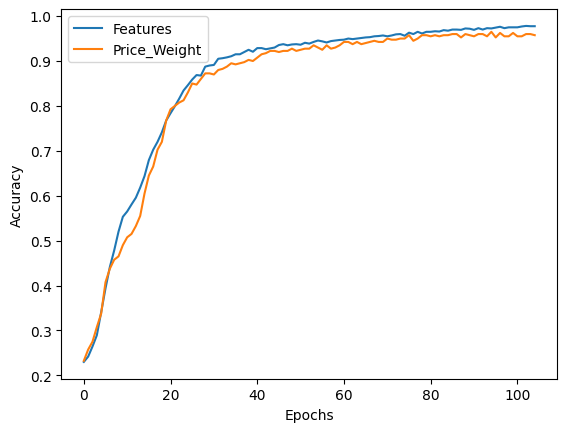

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

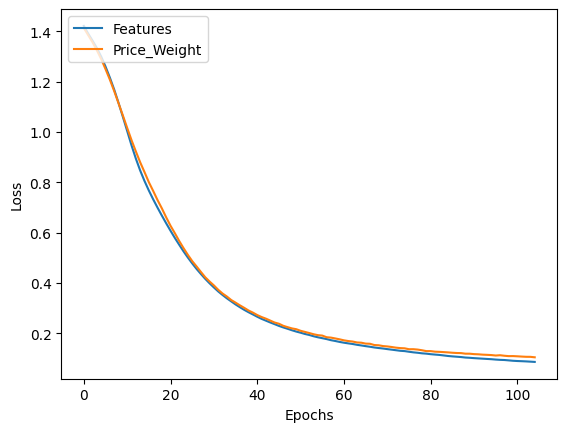

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

In [ ]:
#Created an artificial neural network-based classifier to estimate price of mobiles